- Link Model: https://huggingface.co/pitangent-ds/YOLOv8-human-detection-thermal
- Link Dataset: https://universe.roboflow.com/smart2/persondection-61bc2/dataset/5#
- Link Datasez (version 4): https://universe.roboflow.com/hamac/bien-so-xe-t7p6l/dataset/4

In [ ]:
Kết quả trả về:

```python
Detections(xyxy=array([], shape=(0, 4), dtype=float32), mask=None, confidence=array([], dtype=float32), class_id=array([], dtype=int64), tracker_id=None, data={'class_name': array([], dtype=float64)}, metadata={})
```

cho thấy rằng **mô hình không phát hiện được bất kỳ đối tượng nào** trong ảnh. Điều này có thể xảy ra vì một số lý do:

### 1. **Ảnh không phù hợp với mô hình**
- Mô hình `YOLOv8-human-detection-thermal` có thể đã được huấn luyện trên các ảnh nhiệt hoặc dữ liệu cụ thể. Nếu ảnh của bạn không phải là ảnh nhiệt hoặc khác định dạng dữ liệu đã huấn luyện, mô hình có thể không hoạt động chính xác.

### 2. **Giá trị ngưỡng tin cậy (`conf`) quá cao**
- Bạn đã đặt `conf=0.6`, nghĩa là mô hình chỉ trả về các kết quả có độ tin cậy trên 60%. Nếu không có đối tượng nào vượt qua ngưỡng này, kết quả sẽ trống.
  - Hãy thử giảm ngưỡng tin cậy xuống, ví dụ: `conf=0.3`.

### 3. **Ảnh bị lỗi hoặc không đọc được đúng cách**
- Nếu ảnh đầu vào không được đọc chính xác bởi OpenCV (`cv.imread`), mô hình có thể không suy luận được.
  - Kiểm tra đường dẫn ảnh và đảm bảo rằng ảnh không bị lỗi:
    ```python
    cv_image = cv.imread(image_path, cv.IMREAD_ANYCOLOR)
    if cv_image is None:
        print("Lỗi đọc ảnh!")
    ```

### 4. **Sai mô hình hoặc nhầm tập dữ liệu**
- Mô hình bạn tải về (`YOLOv8-human-detection-thermal`) có thể không được huấn luyện cho loại ảnh hoặc đối tượng mà bạn muốn phát hiện.

---

### Cách khắc phục

1. **Kiểm tra ảnh đầu vào**
   - Đảm bảo rằng ảnh được đọc thành công:
     ```python
     cv.imshow("Image", cv_image)
     cv.waitKey(0)
     ```
   - Xác nhận rằng ảnh phù hợp với dữ liệu mà mô hình được huấn luyện.

2. **Giảm ngưỡng `conf`**
   - Giảm ngưỡng tin cậy khi chạy suy luận:
     ```python
     model_output = model(cv_image, conf=0.3, verbose=False)
     ```

3. **Kiểm tra mô hình**
   - Đảm bảo rằng mô hình bạn sử dụng được huấn luyện để phát hiện loại đối tượng trong ảnh của bạn. Nếu không, bạn có thể cần tìm một mô hình khác phù hợp hơn.

4. **Hiển thị kết quả**
   - Hiển thị các bounding box (nếu có):
     ```python
     detections = Detections.from_ultralytics(model_output[0])
     for bbox in detections.xyxy:
         x1, y1, x2, y2 = map(int, bbox)
         cv.rectangle(cv_image, (x1, y1), (x2, y2), (0, 255, 0), 2)
     cv.imshow("Detections", cv_image)
     cv.waitKey(0)
     ```

Hãy thử kiểm tra các bước trên và chạy lại để xác định vấn đề chính xác nhé!

In [3]:
# Cài đặt các thư viện cần thiết cho YOLOv8
!pip install ultralytics supervision huggingface_hub

# 1. Data

Link: https://universe.roboflow.com/smart2/persondection-61bc2/dataset/
Chọn YoloV8 - Show download code

In [2]:
!pip install roboflow

from roboflow import Roboflow

# Nhập API key của bạn
rf = Roboflow(api_key="R1Rsh0Bx3eiHdB9aSGr2")  # Thay thế bằng API key của bạn

# Kết nối đến workspace và project trên Roboflow
project = rf.workspace("hamac").project("bien-so-xe-t7p6l")

# Chọn phiên bản project để tải dữ liệu  
version = project.version(4)

# Tải dataset dưới định dạng YOLOv8
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 3.2 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to biển-số-xe-4 in yolov8:: 100%|██████████| 8404/8404 [00:00<00:00, 10820.38it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [5]:
dataset


Vẽ cấu trúc thư mục sau khi down về bằng markdown
```bash
/kaggle/working/PersonDection-5/
│
├── valid/
│   ├── images/
│   └── labels/
│
├── train/
│   ├── images/
│   └── labels/
│
├── test/
│   ├── images/
│   └── labels/
│
├── data.yaml
├── README.dataset.txt
├── README.roboflow.txt
└── roboflow.zip
```

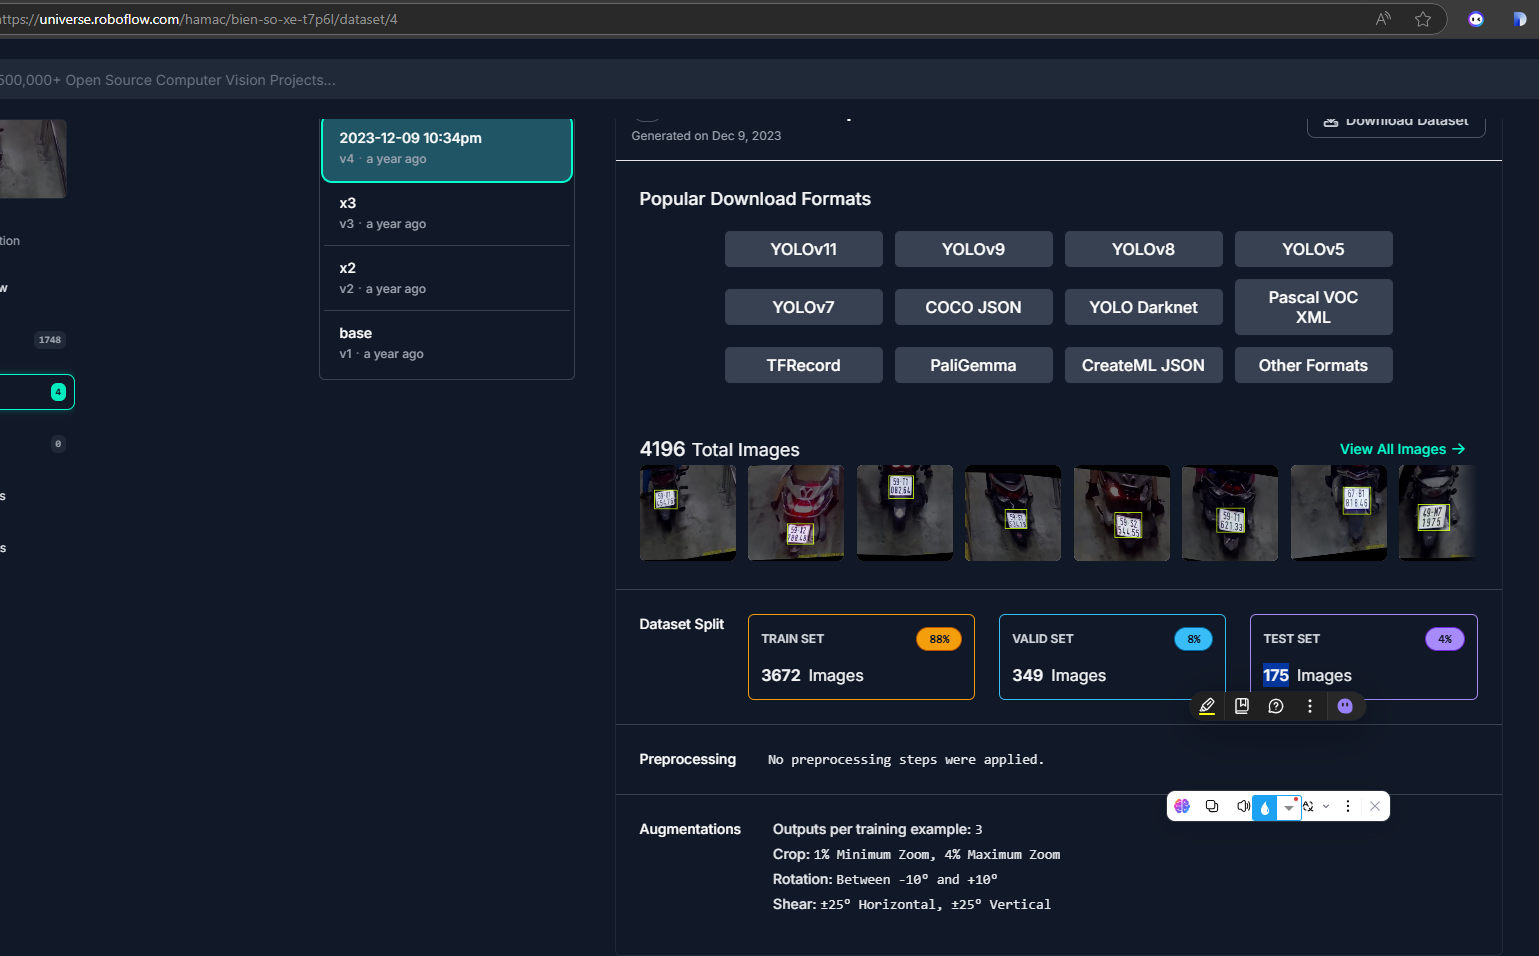

Kiểm tra dataset: 3672  imgs train,3490 valid,1750 test

Kiểm tra thử ảnh và nhãn trong tập trai

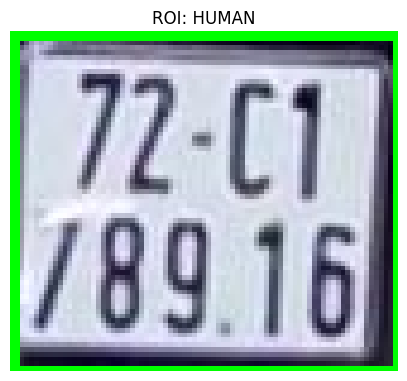

Đã lưu ROI tại: /kaggle/working/roi_0.0_178_118_259_189.jpg


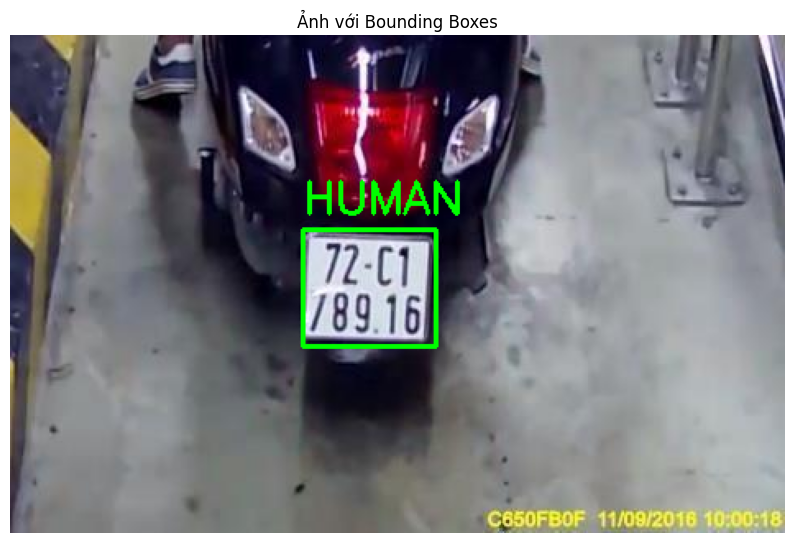

Đã lưu ảnh với bounding boxes tại: /kaggle/working/image_with_bboxes.jpg


In [14]:
import cv2
import matplotlib.pyplot as plt
import os

# Đường dẫn tới ảnh và tệp label
image_path = '/kaggle/working/biển-số-xe-4/test/images/1004_72C178916_jpg.rf.d495a48148e2340a69f4c6566d6196bf.jpg'
label_path = '/kaggle/working/biển-số-xe-4/test/labels/1004_72C178916_jpg.rf.d495a48148e2340a69f4c6566d6196bf.txt'

# Hàm chuyển đổi từ định dạng YOLO sang tọa độ pixel
def yolo_to_pixel(yolo_bbox, img_width, img_height):
    class_id, x_center, y_center, width, height = yolo_bbox
    x_center *= img_width
    y_center *= img_height
    width *= img_width
    height *= img_height
    x1 = int(x_center - width / 2)
    y1 = int(y_center - height / 2)
    x2 = int(x_center + width / 2)
    y2 = int(y_center + height / 2)
    return class_id, x1, y1, x2, y2

# Đọc ảnh
image = cv2.imread(image_path)

# Kiểm tra nếu ảnh được đọc thành công
if image is not None:
    img_height, img_width = image.shape[:2]
    
    bounding_boxes = []
    
    # Kiểm tra xem tệp label có tồn tại không
    if os.path.exists(label_path):
        with open(label_path, 'r') as file:
            lines = file.readlines()
            for line in lines:
                parts = line.strip().split()
                if len(parts) == 5:
                    # Chuyển đổi các giá trị từ string sang float
                    yolo_bbox = list(map(float, parts))
                    class_id, x1, y1, x2, y2 = yolo_to_pixel(yolo_bbox, img_width, img_height)
                    bounding_boxes.append((class_id, x1, y1, x2, y2))
                else:
                    print(f"Dòng không hợp lệ trong tệp label: {line}")
    else:
        print(f"Tệp label không tồn tại tại đường dẫn: {label_path}")
    
    # Kiểm tra nếu có bounding boxes
    if bounding_boxes:
        for bbox in bounding_boxes:
            class_id, x1, y1, x2, y2 = bbox
            
            # Vẽ bounding box trên ảnh
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Màu xanh lá với độ dày 2px
            
            # Ghi nhãn đối tượng (giả sử class_id = 0 là "HUMAN")
            label = "HUMAN" if class_id == 0 else f"Class {class_id}"
            cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
            
            # Cắt vùng bounding box từ ảnh gốc
            roi = image[y1:y2, x1:x2]
            
            # Chuyển đổi từ BGR sang RGB để hiển thị với matplotlib
            roi_rgb = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
            
            # Hiển thị vùng bounding box
            plt.figure(figsize=(5,5))
            plt.imshow(roi_rgb)
            plt.axis('off')
            plt.title(f'ROI: {label}')
            plt.show()
            
            # Nếu muốn lưu vùng bounding box vào file
            output_roi_path = f'/kaggle/working/roi_{class_id}_{x1}_{y1}_{x2}_{y2}.jpg'
            cv2.imwrite(output_roi_path, roi)
            print(f"Đã lưu ROI tại: {output_roi_path}")
        
        # Chuyển đổi từ BGR sang RGB để hiển thị với matplotlib
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        # Hiển thị ảnh với bounding boxes
        plt.figure(figsize=(10,10))
        plt.imshow(image_rgb)
        plt.axis('off')
        plt.title('Ảnh với Bounding Boxes')
        plt.show()
        
        # Lưu ảnh với bounding boxes nếu cần
        output_image_path = '/kaggle/working/image_with_bboxes.jpg'
        cv2.imwrite(output_image_path, image)
        print(f"Đã lưu ảnh với bounding boxes tại: {output_image_path}")
        
    else:
        print("Không có bounding boxes nào trong tệp label.")
        
else:
    print("Không thể đọc ảnh, vui lòng kiểm tra lại đường dẫn.")


# 2. Test Model Trước Khi Huấn Luyện (Inference)

## 2.1 Test 1 ảnh

In [29]:
# Import các thư viện
from huggingface_hub import hf_hub_download
from ultralytics import YOLO
from supervision import Detections
import cv2 as cv

# # Tải mô hình YOLOv8 đã được huấn luyện
# model_path = hf_hub_download(
#     repo_id="pitangent-ds/YOLOv8-human-detection-thermal",
#     filename="model.pt"
# )


# Tải mô hình YOLOv8 Pretrained
model = YOLO("yolov8l.pt")  # hoặc yolov8l.pt nếu bạn cần độ chính xác cao hơn

# Khởi tạo mô hình từ file .pt đã tải
model = YOLO(model_path)


100%|██████████| 83.7M/83.7M [00:00<00:00, 305MB/s]


In [33]:
# Hàm để chạy suy luận
def inference(image_path):
    # Đọc ảnh từ đường dẫn
    cv_image = cv.imread(image_path, cv.IMREAD_ANYCOLOR)
    
    # Chạy mô hình YOLO trên ảnh
    model_output = model(cv_image, conf=0.3, verbose=False)
    
    # Xử lý kết quả đầu ra
    detections = Detections.from_ultralytics(model_output[0])
    
    # Trả về kết quả suy luận
    return detections

# Chạy suy luận trên ảnh cụ thể
detections = inference('/kaggle/working/biển-số-xe-4/test/images/1004_72C178916_jpg.rf.d495a48148e2340a69f4c6566d6196bf.jpg')
print(detections)


Detections(xyxy=array([[     254.73,           0,      471.98,      293.97]], dtype=float32), mask=None, confidence=array([    0.36643], dtype=float32), class_id=array([0]), tracker_id=None, data={'class_name': array(['HUMAN'], dtype='<U5')}, metadata={})


- xyxy: Tọa độ của bounding box (477.36, 258.71, 505.37, 318.28). Đây là các tọa độ điểm giới hạn của hộp bao quanh đối tượng trong ảnh. 
    - x1, y1: Tọa độ của góc trên bên trái của hộp bao quanh (bounding box).
    - x2, y2: Tọa độ của góc dưới bên phải của hộp bao quanh.
    - Trong YOLO, gốc tọa độ (0, 0) thường nằm ở góc trên bên trái của hình ảnh, trục x nằm ngang từ trái sang phải và trục y nằm từ trên xuống dưới.
    - Trong hệ toạ độ Oxy Descartes, gốc tọa độ (0, 0) thường nằm ở giữa hệ trục, và trục y chạy từ dưới lên trên, trái ngược với YOLO.
- confidence (conf) (threshold): Độ tự tin của mô hình là 0.75238 (tức là 75.238%), cho thấy mức độ chắc chắn của mô hình về việc đối tượng được phát hiện là con người.
- class_id: 0 (tương ứng với lớp "HUMAN" trong mô hình của bạn).
- class_name: Tên lớp của đối tượng là HUMAN.


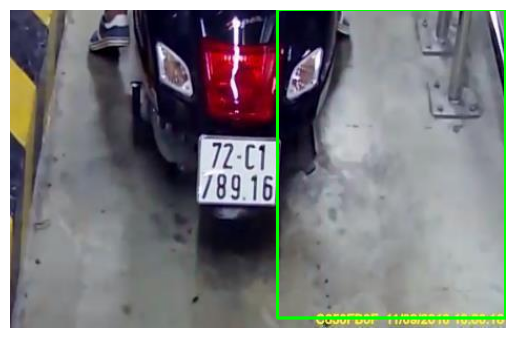

In [35]:
import cv2
import matplotlib.pyplot as plt

# Đọc ảnh
image = cv2.imread('/kaggle/working/biển-số-xe-4/test/images/1004_72C178916_jpg.rf.d495a48148e2340a69f4c6566d6196bf.jpg')

# Kiểm tra nếu ảnh được đọc thành công
if image is not None:
    # Lấy tọa độ bounding box
    x1, y1, x2, y2 = int(254.73), int(0), int(471.98), int(293.97)

    # Vẽ bounding box trên ảnh
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Màu xanh lá với độ dày 2px

    # Ghi nhãn đối tượng
    cv2.putText(image, "HUMAN", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Chuyển đổi từ BGR sang RGB để hiển thị với matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Hiển thị ảnh với matplotlib
    plt.imshow(image_rgb)
    plt.axis('off')  # Ẩn trục tọa độ
    plt.show()
else:
    print("Không thể đọc ảnh, vui lòng kiểm tra lại đường dẫn.")

Detections(xyxy=array([[     108.37,       1.224,      318.34,       165.1],
       [     74.234,      0.1219,      113.66,      45.434]], dtype=float32), mask=None, confidence=array([    0.66768,      0.2935], dtype=float32), class_id=array([2, 0]), tracker_id=None, data={'class_name': array(['car', 'person'], dtype='<U6')}, metadata={})


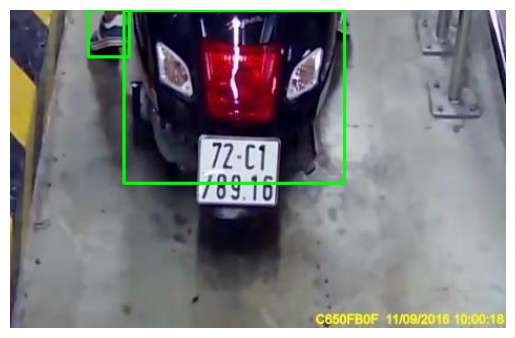

Detections(xyxy=array([[     108.37,       1.224,      318.34,       165.1],
       [     74.234,      0.1219,      113.66,      45.434]], dtype=float32), mask=None, confidence=array([    0.66768,      0.2935], dtype=float32), class_id=array([2, 0]), tracker_id=None, data={'class_name': array(['car', 'person'], dtype='<U6')}, metadata={})


In [44]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
from supervision import Detections

# Tải mô hình YOLOv8 Pretrained
model = YOLO("yolov8l.pt")  # hoặc yolov8l.pt nếu bạn cần độ chính xác cao hơn

# Hàm chạy suy luận và trực quan hóa kết quả
def run_inference_and_visualize(image_path):
    """
    Chạy suy luận trên ảnh đầu vào, vẽ bounding box và trực quan hóa kết quả.

    Args:
        image_path (str): Đường dẫn tới ảnh cần suy luận.

    Returns:
        Detections: Kết quả suy luận từ mô hình YOLO.
    """
    # Đọc ảnh từ đường dẫn
    cv_image = cv2.imread(image_path)
    if cv_image is None:
        raise ValueError("Không thể đọc ảnh. Vui lòng kiểm tra đường dẫn!")

    # Chạy mô hình YOLO trên ảnh
    model_output = model(cv_image, conf=0.2, verbose=False)

    # Xử lý kết quả đầu ra
    detections = Detections.from_ultralytics(model_output[0])
    print(detections)
    
    # Vẽ bounding boxes trên ảnh
    for i, bbox in enumerate(detections.xyxy):
        x1, y1, x2, y2 = map(int, bbox)
        class_name = detections.data.get("class_name", [])[i] if "class_name" in detections.data else "Object"
        confidence = detections.confidence[i] if i < len(detections.confidence) else 0.0

        # Vẽ bounding box
        cv2.rectangle(cv_image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        
        # Thêm nhãn (class name và độ tin cậy)
        label = f"{class_name} {confidence:.2f}"
        cv2.putText(cv_image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Chuyển đổi từ BGR sang RGB để hiển thị với matplotlib
    image_rgb = cv2.cvtColor(cv_image, cv2.COLOR_BGR2RGB)
    
    # Hiển thị ảnh với matplotlib
    plt.imshow(image_rgb)
    plt.axis('off')  # Ẩn trục tọa độ
    plt.show()

    return detections

# Đường dẫn ảnh
image_path = '/kaggle/working/biển-số-xe-4/test/images/1004_72C178916_jpg.rf.d495a48148e2340a69f4c6566d6196bf.jpg'

# Chạy suy luận và trực quan hóa kết quả
detections = run_inference_and_visualize(image_path)
print(detections)



0: 416x640 1 person, 1 car, 50.4ms
Speed: 2.4ms preprocess, 50.4ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 640)


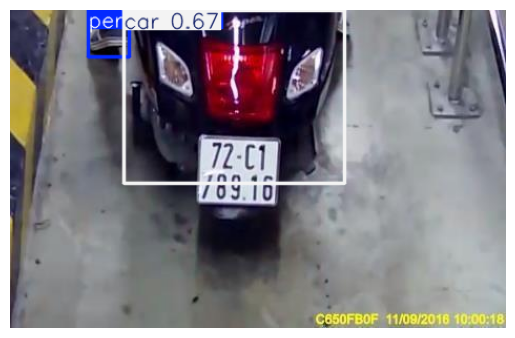

In [46]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Tải mô hình YOLOv8 Pretrained
model = YOLO("yolov8l.pt")  # Sử dụng mô hình YOLOv8 phiên bản lớn hơn (nếu cần)

# Hàm chạy suy luận và trực quan hóa kết quả (sửa lỗi AttributeError)
def run_inference_and_visualize(image_path):
    """
    Chạy suy luận và hiển thị trực tiếp kết quả với YOLOv8.
    
    Args:
        image_path (str): Đường dẫn tới ảnh cần suy luận.
    """
    # Đọc ảnh từ đường dẫn
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Không thể đọc ảnh. Vui lòng kiểm tra đường dẫn!")

    # Chạy mô hình YOLOv8
    results = model(image, conf=0.2)  # Tự động xử lý và gắn nhãn
    
    # Lấy kết quả đầu tiên từ danh sách trả về
    processed_image = results[0].plot()  # Kết quả sau khi YOLO tự vẽ bounding box

    # Hiển thị ảnh đã vẽ bounding box
    plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Ẩn trục tọa độ
    plt.show()
    return results

# Đường dẫn ảnh
image_path = '/kaggle/working/biển-số-xe-4/test/images/1004_72C178916_jpg.rf.d495a48148e2340a69f4c6566d6196bf.jpg'

# Chạy suy luận và hiển thị
results = run_inference_and_visualize(image_path)


Nhận xét: trước khi train model: yolov8n, yolov8s không có khả năng DETECT Biển số xe (như đã thử test ở trên)

# 3. Đánh giá model trước, trong, sau huấn luyện

## 3.1 Đánh giá mô hình trước khi huấn luyện (trên tập validation):

In [36]:
from ultralytics import YOLO

# Tải mô hình YOLOv8n đã được huấn luyện sẵn
model = YOLO("yolov8n.pt")

# Chạy đánh giá trên tập validation
metrics_val = model.val(data='/kaggle/working/biển-số-xe-4/data.yaml')  # Sử dụng tập validation

# In các chỉ số đánh giá trước khi huấn luyện
print("Đánh giá trước khi huấn luyện trên tập validation:")
print(f"Precision: {metrics_val.box.map50:.3f}")
print(f"Recall: {metrics_val.box.map:.3f}")
print(f"mAP@0.5: {metrics_val.box.map50:.3f}")
print(f"mAP@0.5:0.95: {metrics_val.box.map:.3f}")


Ultralytics 8.3.48 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs


val: Scanning /kaggle/working/biển-số-xe-4/valid/labels.cache... 349 images, 0 backgrounds, 0 corrupt: 100%|██████████| 349/349 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  7.74it/s]


                   all        349        349    0.00155     0.0372    0.00081    0.00013
                person        349        349    0.00155     0.0372    0.00081    0.00013
Speed: 0.2ms preprocess, 3.0ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/val3
Đánh giá trước khi huấn luyện trên tập validation:
Precision: 0.001
Recall: 0.000
mAP@0.5: 0.001
mAP@0.5:0.95: 0.000


- Precision 0.526 và mAP@0.5 0.526 là mức độ khá trung bình, nhưng điều này chỉ là trước khi huấn luyện, có nghĩa là mô hình chưa được tối ưu và chỉ dựa trên mô hình YOLOv8 cơ bản.
- Recall 0.333 khá thấp, chỉ ra rằng mô hình hiện tại không phát hiện được nhiều đối tượng trong dữ liệu. Điều này rất phổ biến trước khi huấn luyện vì mô hình chưa học được nhiều thông tin từ dữ liệu cụ thể.
- mAP@0.5:0.95 0.333: Đây là một chỉ số quan trọng thể hiện mức độ tổng quát hóa của mô hình khi các yêu cầu về độ chồng lấn (IoU) càng khắt khe hơn. Với chỉ số thấp, mô hình trước huấn luyện khó có khả năng dự đoán chính xác khi các đối tượng trong ảnh bị chồng chéo phức tạp.

## 3.2 Huấn luyện mô hình trên tập training và validation:Huấn luyện mô hình trên tập training và validation:

### Bảng tóm tắt về thời gian huấn luyện và các phương pháp tăng tốc:

| **Yếu tố**                | **Dự tính/Khuyến nghị**                                                               |
|---------------------------|----------------------------------------------------------------------------------------|
| **Số lượng ảnh**           | 8000 ảnh huấn luyện, 1000 ảnh xác thực.                                                |
| **Thời gian huấn luyện**   | 50-250 phút (khoảng 1 đến 4 giờ) trên GPU Tesla T4 (50 epochs, imgsz=640x640).        |
| **Sử dụng mô hình nhẹ hơn**| Dùng YOLOv8n (nano) để giảm thời gian huấn luyện, nhưng có thể giảm độ chính xác.      |
| **Giảm kích thước ảnh**    | Giảm kích thước ảnh từ 640x640 xuống 416x416 để tăng tốc độ huấn luyện.               |
| **Giảm số lượng epochs**   | Thử huấn luyện với 30 epochs để rút ngắn thời gian và theo dõi kết quả sau đó.        |
| **Mixed Precision Training**| Sử dụng huấn luyện với precision hỗn hợp (`half=True`) để tăng tốc độ huấn luyện.     |


Mình chọn: log vào MLflow vì mình chưa dùng bao giờ (W&B mình từng dùng rùi)

In [12]:
!pip install wandb
!pip install -U ipywidgets # cập nhật từ 7.7.1 lên 8.0 

In [13]:
import os
import wandb

# # Need Enter key
# wandb.login()

# # Đăng nhập bằng biến môi trường
# wandb.login(key=os.getenv("WANDB_API_KEY"))

# Đăng nhập trực tiếp vào WandB bằng API key
wandb.login(key="c8767797aae76cbcd389ff29929ace1ac3021161")

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
# # Tải mô hình YOLOv8n
# model = YOLO("yolov8n.pt")

# # Huấn luyện mô hình và tích hợp WandB với tên chi tiết
# model.train(
#     data='/kaggle/working/PersonDection-5/data.yaml',  # Đường dẫn tới file cấu hình dữ liệu
#     epochs=3,                   # Số lượng epochs
#     imgsz=640,                   # Kích thước ảnh
#     project="ThermalHumanDetect_YOLO",     # Tên project trên WandB
#     name="YOLOv8n_ThermalHumanDetect_img640_epochs3_mixedPrecision_noAug_lr0.01",  # name RUN, Tên chi tiết
#     save_period=1,               # Lưu kết quả mỗi 1 epochs
#     device="cuda",               # Sử dụng GPU
#     half=True,                   # Mixed precision để tăng tốc độ huấn luyện
#     lr0=0.01                     # Learning rate ban đầu là 0.01
# )


In [ ]:
# # Đánh giá mô hình trên tập test
# metrics_test = model.val(data='/kaggle/working/PersonDection-5/data.yaml', split="test")

# # In các chỉ số sau huấn luyện
# print("Kết quả đánh giá trên tập test sau huấn luyện:")
# print(f"Precision: {metrics_test.box.map50:.3f}")
# print(f"Recall: {metrics_test.box.map:.3f}")
# print(f"mAP@0.5: {metrics_test.box.map50:.3f}")
# print(f"mAP@0.5:0.95: {metrics_test.box.map:.3f}")


In [ ]:
# # Tải mô hình YOLOv8n
# model = YOLO("yolov8n.pt")

# # Huấn luyện mô hình và tích hợp WandB với tên chi tiết
# model.train(
#     data='/kaggle/working/PersonDection-5/data.yaml',  # Đường dẫn tới file cấu hình dữ liệu
#     epochs=15,                   # Số lượng epochs
#     imgsz=640,                   # Kích thước ảnh
#     project="ThermalHumanDetect_YOLO",     # Tên project trên WandB
#     name="YOLOv8n_ThermalHumanDetect_img640_epochs15_mixedPrecision_noAug_lr0.01",  # name RUN, Tên chi tiết
#     save_period=1,               # Lưu kết quả mỗi 1 epochs
#     device="cuda",               # Sử dụng GPU
#     half=True,                   # Mixed precision để tăng tốc độ huấn luyện
#     lr0=0.01                     # Learning rate ban đầu là 0.01
# )


Tóm tắt các lựa chọn mô hình YOLOv8 phù hợp cho **8000 ảnh train**, **1000 ảnh validation** và GPU **T4 x2** trên Kaggle:

| **Phiên bản YOLOv8** | **Ưu tiên**                      | **Độ chính xác**                 | **Thời gian dự kiến (50 epochs)** | **Khuyến nghị**                                                                                 |
|-----------------------|----------------------------------|-----------------------------------|-----------------------------------|-------------------------------------------------------------------------------------------------|
| **YOLOv8n (Nano)**    | Tốc độ tối đa, tài nguyên nhẹ   | Thấp nhất                         | < 1 giờ                           | Phù hợp cho các thử nghiệm nhanh hoặc các ứng dụng cần tốc độ cao, chấp nhận độ chính xác thấp. |
| **YOLOv8s (Small)**   | Cân bằng giữa tốc độ và độ chính xác | Tốt, độ chính xác vừa phải         | 1-2 giờ                           | Lựa chọn tốt nếu cần cân bằng giữa hiệu suất và thời gian huấn luyện.                           |
| **YOLOv8m (Medium)**  | Độ chính xác cao hơn YOLOv8s    | Cao                               | 2-4 giờ                           | Phù hợp cho các bài toán yêu cầu độ chính xác cao hơn và sẵn sàng đợi lâu hơn để huấn luyện.    |

### Gợi ý
- **YOLOv8s** là lựa chọn **cân bằng** giữa thời gian và độ chính xác cho bài toán của bạn.
- **YOLOv8m** nếu bạn cần **độ chính xác cao hơn** và có thể dành nhiều thời gian cho quá trình huấn luyện.

In [ ]:
# # Đánh giá mô hình trên tập test
# metrics_test = model.val(data='/kaggle/working/PersonDection-5/data.yaml', split="test")

# # In các chỉ số sau huấn luyện
# print("Kết quả đánh giá trên tập test sau huấn luyện:")
# print(f"Precision: {metrics_test.box.map50:.3f}")
# print(f"Recall: {metrics_test.box.map:.3f}")
# print(f"mAP@0.5: {metrics_test.box.map50:.3f}")
# print(f"mAP@0.5:0.95: {metrics_test.box.map:.3f}")


| **Chỉ Số**        | **Ý Nghĩa**                                                                                          | **Thế nào là tốt?**                                                                                     | **Validation - trước huấn luyện** | **Validation - 3 epochs - Yolov8s - No Augmentation** | **Validation - 15 epochs - Yolov8s - No Augmentation** | **Test - 15 epochs - Yolov8s - No Augmentation** |
|-------------------|------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------|-------------------------------|--------------------------|--------------------------|--------------------|
| **Time Training/Inference** | Thời gian huấn luyện hoặc suy luận cho mỗi lần đánh giá mô hình. | Thời gian ngắn giúp tối ưu hiệu suất mô hình. | N/A | 0.08 giờ | 0.4 giờ | 0.01 giờ |
| **Precision**      | Tỉ lệ giữa số dự đoán đúng (true positives) và tổng số các dự đoán (true positives + false positives). Precision cao nghĩa là mô hình ít dự đoán sai. | Precision cao thể hiện độ chính xác của mô hình trong việc đưa ra dự đoán đúng.                          | 0.526                        | 0.808                   | 0.865                   | 0.904             |
| **Recall**         | Tỉ lệ giữa số dự đoán đúng và tổng số đối tượng thực sự có (true positives + false negatives). Recall cao nghĩa là mô hình phát hiện tốt các đối tượng. | Recall cao thể hiện khả năng phát hiện đầy đủ các đối tượng trong dữ liệu.                               | 0.333                        | 0.713                   | 0.811                   | 0.597             |
| **mAP@0.5**        | Mean Average Precision tại ngưỡng IoU = 0.5, đo lường độ chính xác của dự đoán khi yêu cầu độ chồng lấn giữa các hộp giới hạn là 50%. | mAP@0.5 cao cho thấy mô hình có khả năng phát hiện tốt các đối tượng với độ chính xác hộp giới hạn (bounding boxes). | 0.526                        | 0.808                   | 0.898                   | 0.904             |
| **mAP@0.5:0.95**   | Mean Average Precision trung bình qua nhiều ngưỡng IoU từ 0.5 đến 0.95. Chỉ số này phản ánh khả năng dự đoán chính xác với các mức độ chồng lấn khác nhau. | mAP@0.5:0.95 cao thể hiện khả năng tổng quát hóa tốt của mô hình, đặc biệt trong các bài toán có các đối tượng chồng lấn. | 0.333                        | 0.499                   | 0.618                   | 0.597             |



# 4. Improve Model - Yolov8s - 30 epochs - withAugmentation

In [37]:
from ultralytics import YOLO

# Tải mô hình YOLOv8m
model = YOLO("yolov8s.pt")

# Huấn luyện mô hình và tích hợp WandB với tên chi tiết
model.train(
    data='/kaggle/working/biển-số-xe-4/data.yaml',  # Đường dẫn tới file cấu hình dữ liệu
    epochs=2,                   # Số lượng epochs
    imgsz=640,                   # Kích thước ảnh
    project="NumberPlateDetect_YOLO",     # Tên project trên WandB
    name="YOLOv8s_NumberPlateDetect_img640_epochs2_mixedPrecision_withAug_lr0.01",  # name RUN, Tên chi tiết
    save_period=10,               # Lưu kết quả mỗi 10 epochs - CHỈ LƯU Ở KAGGLE, KO LƯU TRÊN WANDB ĐƯỢC. 
    device="cuda",               # Sử dụng GPU
    half=True,                   # Mixed precision để tăng tốc độ huấn luyện
    lr0=0.01,                    # Learning rate ban đầu là 0.01
    augment=True                 # Kích hoạt augmentation
)


Ultralytics 8.3.48 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/working/biển-số-xe-4/data.yaml, epochs=2, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=10, cache=False, device=cuda, workers=8, project=NumberPlateDetect_YOLO, name=YOLOv8s_NumberPlateDetect_img640_epochs2_mixedPrecision_withAug_lr0.01, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=True, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt

train: Scanning /kaggle/working/biển-số-xe-4/train/labels.cache... 3672 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3672/3672 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /kaggle/working/biển-số-xe-4/valid/labels.cache... 349 images, 0 backgrounds, 0 corrupt: 100%|██████████| 349/349 [00:00<?, ?it/s]


Plotting labels to NumberPlateDetect_YOLO/YOLOv8s_NumberPlateDetect_img640_epochs2_mixedPrecision_withAug_lr0.01/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to NumberPlateDetect_YOLO/YOLOv8s_NumberPlateDetect_img640_epochs2_mixedPrecision_withAug_lr0.01
Starting training for 2 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/2      4.31G      1.004      0.817      1.143         17        640: 100%|██████████| 230/230 [01:01<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  5.08it/s]

                   all        349        349      0.999          1      0.995      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/2       4.3G     0.8748     0.4372      1.062         11        640: 100%|██████████| 230/230 [00:59<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  5.18it/s]

                   all        349        349      0.999          1      0.995      0.892



2 epochs completed in 0.039 hours.
Optimizer stripped from NumberPlateDetect_YOLO/YOLOv8s_NumberPlateDetect_img640_epochs2_mixedPrecision_withAug_lr0.01/weights/last.pt, 22.5MB
Optimizer stripped from NumberPlateDetect_YOLO/YOLOv8s_NumberPlateDetect_img640_epochs2_mixedPrecision_withAug_lr0.01/weights/best.pt, 22.5MB

Validating NumberPlateDetect_YOLO/YOLOv8s_NumberPlateDetect_img640_epochs2_mixedPrecision_withAug_lr0.01/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.61it/s]


                   all        349        349      0.999          1      0.995      0.883
Speed: 0.1ms preprocess, 8.0ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to NumberPlateDetect_YOLO/YOLOv8s_NumberPlateDetect_img640_epochs2_mixedPrecision_withAug_lr0.01


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7eeedc7de170>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [38]:
# Đánh giá mô hình trên tập test
metrics_test = model.val(data='/kaggle/working/biển-số-xe-4/data.yaml', split="test")

# In các chỉ số sau huấn luyện
print("Kết quả đánh giá trên tập test sau huấn luyện:")
print(f"Precision: {metrics_test.box.map50:.3f}")
print(f"Recall: {metrics_test.box.map:.3f}")
print(f"mAP@0.5: {metrics_test.box.map50:.3f}")
print(f"mAP@0.5:0.95: {metrics_test.box.map:.3f}")


Ultralytics 8.3.48 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /kaggle/working/biển-số-xe-4/test/labels.cache... 175 images, 0 backgrounds, 0 corrupt: 100%|██████████| 175/175 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.58it/s]


                   all        175        175      0.999          1      0.995      0.894
Speed: 0.1ms preprocess, 8.2ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to NumberPlateDetect_YOLO/YOLOv8s_NumberPlateDetect_img640_epochs2_mixedPrecision_withAug_lr0.012
Kết quả đánh giá trên tập test sau huấn luyện:
Precision: 0.995
Recall: 0.894
mAP@0.5: 0.995
mAP@0.5:0.95: 0.894


In [40]:
# ĐÁNH GIÁ THỬ LẠI TRÊN ẢNH LÚC ĐẦU MÌNH TEST TRƯỚC KHI TRAIN MODEL
from huggingface_hub import hf_hub_download
from ultralytics import YOLO
from supervision import Detections
import cv2 as cv

# # Tải mô hình YOLOv8 đã được huấn luyện
# model_path = hf_hub_download(
#     repo_id="pitangent-ds/YOLOv8-human-detection-thermal",
#     filename="model.pt"
# )


# /kaggle/working/ThermalHumanDetect_YOLO/YOLOv8s_NumberPlateDetect_img640_epochs2_mixedPrecision_withAug_lr0.01/weights
# # Khởi tạo mô hình từ file .pt đã tải
# model = YOLO(model_path)


# Hàm để chạy suy luận
def inference(image_path):
    # Đọc ảnh từ đường dẫn
    cv_image = cv.imread(image_path, cv.IMREAD_ANYCOLOR)
    
    # Chạy mô hình YOLO trên ảnh
    model_output = model(cv_image, conf=0.2, verbose=False)
    
    # Xử lý kết quả đầu ra
    detections = Detections.from_ultralytics(model_output[0])
    
    # Trả về kết quả suy luận
    return detections

# Chạy suy luận trên ảnh cụ thể
detections = inference('/kaggle/working/biển-số-xe-4/test/images/1004_72C178916_jpg.rf.d495a48148e2340a69f4c6566d6196bf.jpg')
print(detections)


Detections(xyxy=array([[     175.34,      117.54,       257.2,      186.31]], dtype=float32), mask=None, confidence=array([    0.90967], dtype=float32), class_id=array([0]), tracker_id=None, data={'class_name': array(['0'], dtype='<U1')}, metadata={})


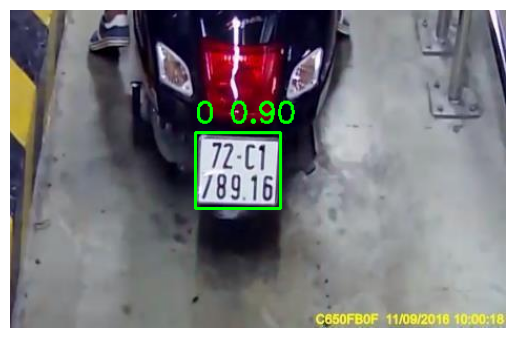

Detections(xyxy=array([[      176.4,      117.58,      257.94,      189.19]], dtype=float32), mask=None, confidence=array([    0.90319], dtype=float32), class_id=array([0]), tracker_id=None, data={'class_name': array(['0'], dtype='<U1')}, metadata={})


In [43]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
from supervision import Detections

# Khởi tạo mô hình từ file .pt đã tải
model = YOLO("/kaggle/working/NumberPlateDetect_YOLO/YOLOv8s_NumberPlateDetect_img640_epochs2_mixedPrecision_withAug_lr0.01/weights/best.pt")  # Cập nhật model đúng với bài toán của bạn

# Hàm chạy suy luận và trực quan hóa kết quả
def run_inference_and_visualize(image_path):
    """
    Chạy suy luận trên ảnh đầu vào, vẽ bounding box và trực quan hóa kết quả.

    Args:
        image_path (str): Đường dẫn tới ảnh cần suy luận.

    Returns:
        Detections: Kết quả suy luận từ mô hình YOLO.
    """
    # Đọc ảnh từ đường dẫn
    cv_image = cv2.imread(image_path)
    if cv_image is None:
        raise ValueError("Không thể đọc ảnh. Vui lòng kiểm tra đường dẫn!")

    # Chạy mô hình YOLO trên ảnh
    model_output = model(cv_image, conf=0.2, verbose=False)

    # Xử lý kết quả đầu ra
    detections = Detections.from_ultralytics(model_output[0])
    
    # Vẽ bounding boxes trên ảnh
    for i, bbox in enumerate(detections.xyxy):
        x1, y1, x2, y2 = map(int, bbox)
        class_name = detections.data.get("class_name", [])[i] if "class_name" in detections.data else "Object"
        confidence = detections.confidence[i] if i < len(detections.confidence) else 0.0

        # Vẽ bounding box
        cv2.rectangle(cv_image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        
        # Thêm nhãn (class name và độ tin cậy)
        label = f"{class_name} {confidence:.2f}"
        cv2.putText(cv_image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Chuyển đổi từ BGR sang RGB để hiển thị với matplotlib
    image_rgb = cv2.cvtColor(cv_image, cv2.COLOR_BGR2RGB)
    
    # Hiển thị ảnh với matplotlib
    plt.imshow(image_rgb)
    plt.axis('off')  # Ẩn trục tọa độ
    plt.show()

    return detections

# Đường dẫn ảnh
image_path = '/kaggle/working/biển-số-xe-4/test/images/1004_72C178916_jpg.rf.d495a48148e2340a69f4c6566d6196bf.jpg'

# Chạy suy luận và trực quan hóa kết quả
detections = run_inference_and_visualize(image_path)
print(detections)


Detections(xyxy=array([], shape=(0, 4), dtype=float32), mask=None, confidence=array([], dtype=float32), class_id=array([], dtype=int64), tracker_id=None, data={'class_name': array([], dtype=float64)}, metadata={})

Sau khi đánh giá model detect khá chính xác biển số xe 

Kết quả trước huấn luyện: 

```python
from ultralytics import YOLO

# Tải mô hình YOLOv8n đã được huấn luyện sẵn
model = YOLO("yolov8n.pt")

# Chạy đánh giá trên tập validation
metrics_val = model.val(data='/kaggle/working/biển-số-xe-4/data.yaml')  # Sử dụng tập validation

# In các chỉ số đánh giá trước khi huấn luyện
print("Đánh giá trước khi huấn luyện trên tập validation:")
print(f"Precision: {metrics_val.box.map50:.3f}")
print(f"Recall: {metrics_val.box.map:.3f}")
print(f"mAP@0.5: {metrics_val.box.map50:.3f}")
print(f"mAP@0.5:0.95: {metrics_val.box.map:.3f}")

```

```
Ultralytics 8.3.48 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs
val: Scanning /kaggle/working/biển-số-xe-4/valid/labels.cache... 349 images, 0 backgrounds, 0 corrupt: 100%|██████████| 349/349 [00:00<?, ?it/s]
RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  7.74it/s]
                   all        349        349    0.00155     0.0372    0.00081    0.00013
                person        349        349    0.00155     0.0372    0.00081    0.00013
Speed: 0.2ms preprocess, 3.0ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/val3
Đánh giá trước khi huấn luyện trên tập validation:
Precision: 0.001
Recall: 0.000
mAP@0.5: 0.001
mAP@0.5:0.95: 0.000
```


Train với 
```python
from ultralytics import YOLO

# Tải mô hình YOLOv8m
model = YOLO("yolov8s.pt")

# Huấn luyện mô hình và tích hợp WandB với tên chi tiết
model.train(
    data='/kaggle/working/biển-số-xe-4/data.yaml',  # Đường dẫn tới file cấu hình dữ liệu
    epochs=2,                   # Số lượng epochs
    imgsz=640,                   # Kích thước ảnh
    project="NumberPlateDetect_YOLO",     # Tên project trên WandB
    name="YOLOv8s_NumberPlateDetect_img640_epochs2_mixedPrecision_withAug_lr0.01",  # name RUN, Tên chi tiết
    save_period=10,               # Lưu kết quả mỗi 10 epochs - CHỈ LƯU Ở KAGGLE, KO LƯU TRÊN WANDB ĐƯỢC. 
    device="cuda",               # Sử dụng GPU
    half=True,                   # Mixed precision để tăng tốc độ huấn luyện
    lr0=0.01,                    # Learning rate ban đầu là 0.01
    augment=True                 # Kích hoạt augmentation
)

```

Cho kết quả: 
```
Ultralytics 8.3.48 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /kaggle/working/biển-số-xe-4/test/labels.cache... 175 images, 0 backgrounds, 0 corrupt: 100%|██████████| 175/175 [00:00<?, ?it/s]
RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.58it/s]
                   all        175        175      0.999          1      0.995      0.894
Speed: 0.1ms preprocess, 8.2ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to NumberPlateDetect_YOLO/YOLOv8s_NumberPlateDetect_img640_epochs2_mixedPrecision_withAug_lr0.012
Kết quả đánh giá trên tập test sau huấn luyện:
Precision: 0.995
Recall: 0.894
mAP@0.5: 0.995
mAP@0.5

```

Với :0.95: 0.894

Finish